# Sesión 6 B

## Actualización bayesiana continua

> **Objetivos:**
> - Comprender una familia de distributiones parametrizadas que representa un rango continuo de hipótesis para los datos observados.
>
> - Aplicar el teorema de Bayes para actualizar la densidad de probabilidad dados los datos y una distribución posterior.
>
> - Interpretar y usar probabilidades predictivas posteriores.

### 1. De hipótesis discretas a parámetros continuos  

En los ejemplos anteriores trabajamos con un modelo **discreto**:

- Teníamos un conjunto **finito de hipótesis**: la moneda podía ser de tipo A, B o C, cada una con su probabilidad previa.  

- La distribución $p(\theta)$ representaba esa creencia inicial sobre **cuál hipótesis era verdadera**.  

En ese escenario, el razonamiento bayesiano consistía en:  
1. Asignar probabilidades a las hipótesis (previas).  
2. Observar datos (por ejemplo, caras al lanzar la moneda).  
3. Actualizar esas probabilidades mediante Bayes, obteniendo una **posterior discreta** sobre el conjunto de hipótesis.  

Ahora pasamos a un escenario distinto: el **caso continuo**.  
- Ya no pensamos en un número finito de hipótesis, sino en un **parámetro desconocido $\theta$**.  
- Por ejemplo, $\theta$ puede ser la probabilidad de obtener cara al lanzar una moneda.  
- Como no sabemos su valor exacto, suponemos que $\theta$ puede tomar **infinitos valores en el intervalo $[0,1]$**.  

En este caso:  
- La verosimilitud sigue siendo discreta (los datos son lanzamientos: cara o cruz, modelados por una Bernoulli).  
- Pero la distribución **previa sobre $\theta$** es ahora una distribución **continua**.  

Así, el proceso bayesiano cambia de "asignar probabilidades a hipótesis finitas" a "asignar densidades de probabilidad a un espacio continuo de posibles valores para el parámetro".  

> En resumen:  
> - **Caso discreto**: $p(\theta)$ representa probabilidades sobre un conjunto finito de > hipótesis (tipos de monedas).
>
> - **Caso continuo**: $p(\theta)$ es una densidad sobre todos los valores posibles del > parámetro $\theta$.

### 2. Justificación de usar $\theta$ continua

El enfoque _continuo_ es más realista en muchos contextos, porque en la práctica no sabemos de antemano cuáles son los valores posibles de la probabilidad de cara.

En lugar de restringirnos a 3 hipótesis, admitimos que la probabilidad de cara $\theta$ puede ser cualquier número real en $[0,1]$.

Así, el modelo nos permite **aprender directamente la probabilidad de éxito** en vez de solo elegir entre hipótesis predefinidas.

### 3. Previas continuas, verosimilitudes discretas

**Dos niveles en el modelo bayesiano**

Cuando aplicamos Bayes, siempre jugamos en dos niveles distintos de incertidumbre:

$$
p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)}.
$$

1. Nivel de los datos (observaciones):

    * En el ejemplo de la moneda, los datos provienen de una Bernoulli, es decir, $X \in {0,1}$.

    * Esto significa que la verosimilitud (la probabilidad de observar los datos dados los parámetros) $p(x|\theta)$ es **discreta.**

2.  Nivel del parámetro desconocido $\theta$:

    * Aquí, $\theta$ es la probabilidad de éxito (caer cara).

    * No conocemos $\theta$, pero asumimos que **puede tomar infinitos valores en [0,1]**.

    * Como no sabemos cuál es $\theta$, lo tratamos como una _variable aleatoria continua_ con su propia distribución: **la distribución previa (prior)** $p(\theta)$.

```{admonition} Nota
:class: tip

Recuerda que el parámetro o los parámetros de una distribución siempre son los mismos para cada distribución.

Lo que cambia es **cómo estimamos según el enfoque**:

![](../images/sesion6-comparacion-mle-map-bayes.png)
```

#### **Ejemplo**

Supongamos que tenemos una moneda con probabilidad desconocida $\theta$ de caer en cara. El valor de $\theta$ es aleatorio y podría ser cualquier valor entre 0 y 1.

##### **Prior**

Para modelar nuestra incertidumbre sobre $\theta$, **asumimos** que:

$$ p(\theta) = 2\theta
$$

para $0 \leq \theta \leq 1$

```{figure} ../images/sesion6-comparacionprevias.png
:alt: representacion
:fig-align: center
:width: 500px
```

> * Nuestra **creencia previa (prior)** sobre $\theta$ no es uniforme.

> * Estamos diciendo que, antes de ver los datos, creemos que valores grandes de $\theta$ (más cercanos a 1) son **más probables** que valores pequeños (más cercanos a 0).

> * Es una pdf válida porque:

> $$ \int_0^1 2\theta d\theta = 1$$

> **Observa lo interesante:** 
> - La previa es _continua_ (porque $\theta$ puede variar en infinitos valores).
> - La verosimilitud es _discreta_ (porque los datos son 0 o 1).

##### **Verosimilitud**

Tenemos una _verosimilitud discreta_ dado que tirar una moneda solo tiene dos posibles resultados:

$$
p(x=1 | \theta) = \theta, \qquad p(x=0 | \theta) = 1 - \theta
$$

##### **Enfoque bayesiano**

Si:

$$
\text{Numerador de Bayes} \;=\; 
\underbrace{p(x \mid \theta)}_{\text{verosimilitud (discreta)}}\;
\underbrace{p(\theta)}_{\text{previa (continua)}}
$$

Normalizamos diviendo por la probailidad total 


$$
p(x) \;=\; \int_{0}^{1} p(x \mid \theta)\, p(\theta)\, d\theta
\quad \Rightarrow \quad
p(\theta \mid x) \;=\; \frac{p(x \mid \theta)\, p(\theta)}{p(x)}
$$

> En este caso, la *ley de probabilidad total* la escribimos como:
> $$p(x) = \int_{-\infty}^{\infty} p(x | \theta) p(\theta) \text{d}\theta$$

#### Ejemplo 1: una sola observación (cara)

Supongamos que tiramos la moneda una vez y obtenemos cara ($x=1$).

* verosimilitud:

$$
p(x=1 \mid \theta) = \theta
$$

* previa:

$$
p(\theta) = 2\theta, \quad 0 \leq \theta \leq 1
$$

* numerador de Bayes:

$$
p(x=1 \mid \theta)\, p(\theta) = \theta \cdot 2\theta = 2\theta^2
$$

* probabilidad total:

$$
\begin{aligned}
p(x=1) &= \int_{0}^{1} 
          \underbrace{\theta}_{\text{verosimilitud}}\;
          \underbrace{2\theta}_{\text{previa}}\, d\theta \\[6pt]
       &= \int_{0}^{1} 2\theta^2\, d\theta \\[6pt]
       &= 2\left[\tfrac{\theta^3}{3}\right]_{0}^{1} \\[6pt]
       &= \tfrac{2}{3}
\end{aligned}
$$


Con esta probabilidad total ya podemos calcular la posterior, 
normalizando el numerador de Bayes:

* posterior:

$$
p(\theta \mid x=1) = \frac{2\theta^2}{2/3} = 3\theta^2
$$

#### Cálculo simbólico con `sympy`

In [1]:
import sympy as sp

# Definimos el símbolo
theta = sp.symbols('θ')

# Definimos la prior y la verosimilitud
prior = 2*theta
likelihood = theta

# Evidencia (normalización): ∫ θ * 2θ dθ de 0 a 1
p_evidencia = sp.integrate(likelihood * prior, (theta, 0, 1))
print("Evidencia p(x=1) =", p_evidencia)

# Posterior = numerador / evidencia
posterior = (likelihood * prior) / p_evidencia
posterior_simpl = sp.simplify(posterior) #simplifica la expressión
print("Posterior p(θ|x=1) =", posterior_simpl)

Evidencia p(x=1) = 2/3
Posterior p(θ|x=1) = 3*θ**2


#### Cálculo numérico con `numpy`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Theta
theta = np.linspace(0, 1, 200)

# Prior y verosimilitud evaluadas en theta
prior_vals = 2 * theta
likelihood_vals = theta

# Evidencia en forma cerrada
p_x = 2/3  

# Posterior evaluada punto a punto
posterior_vals = (likelihood_vals * prior_vals) / p_x 

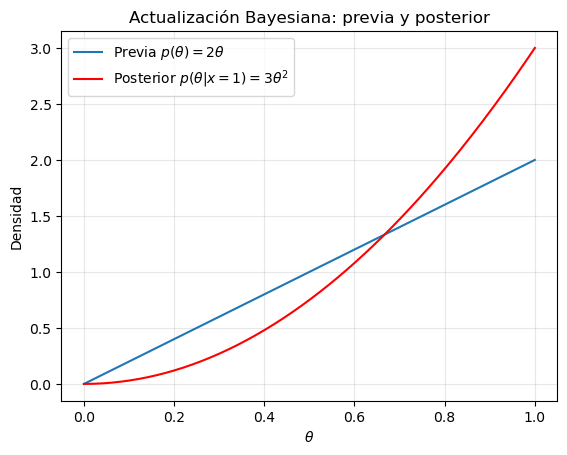

In [3]:
# Graficamos
plt.plot(theta, prior_vals, label=r'Previa $p(\theta)=2\theta$')
plt.plot(theta, posterior_vals, color='red', label=r'Posterior $p(\theta|x=1)=3\theta^2$')
plt.xlabel(r'$\theta$')
plt.ylabel("Densidad")
plt.title("Actualización Bayesiana: previa y posterior")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

> **Nota.** Precisamente la ley de probabilidad total será, en general, bastante compleja de calcular en la mayoría de los casos, por lo que luego nos decantaremos por métodos numéricos para aproximar la distribución posterior.

#### Ejemplo 2: (varios datos)

Supongamos que observamos en tres tiros de la moneda, la secuencia cara-cara-sello.
 
Calculemos la pdf posterior para $\theta$:

#### Cálculo simbólico con `sympy`

1) Previa:

$$
p(\theta) = 2\theta, \quad 0 \leq \theta \leq 1
$$

In [4]:
theta = sp.symbols('θ')
prior = 2*theta
prior

2*θ

2. Verosimilitud de la secuencia cara-cara-sello (1,1,0):

$$
p(x=1,1,0|\theta) = \theta * \theta * (1-\theta) = \theta^2 (1-\theta)
$$

In [5]:
likelihood = theta*theta*(1-theta)
likelihood

θ**2*(1 - θ)

3. Numerador de Bayes _(previa * verosimilitud)_:

$$
p(\theta|x=1,1,0) \propto p(\theta) \cdot p(x=1,1,0|\theta)
$$

In [6]:
numerador = likelihood * prior
numerador

2*θ**3*(1 - θ)

4. Probabilidad total (evidencia) - normalización:

$$
p(x=1,1,0)= \int_{0}^{1} p(x=1,1,0|\theta) p(\theta) d\theta
$$

In [7]:
p_evidencia = sp.integrate(numerador, (theta, 0, 1))
p_evidencia

1/10

5. Posterior:

$$
p(\theta|x=1,1,0) = \frac{p(x=1,1,0|\theta) p(\theta)}{p(x=1,1,0)}
$$

In [8]:
posterior_expr = numerador / p_evidencia
posterior_simpl = sp.simplify(posterior_expr)
posterior_simpl

20*θ**3*(1 - θ)

#### Cálculo numérico con `numpy`

In [9]:
import numpy as np

# Rango de θ
theta = np.linspace(0, 1, 1001)

# Previa p(θ)
prior_density = 2 * theta

# Verosimilitud de los datos (x=1,1,0)
likelihood_vals = theta**2 * (1 - theta)

# Numerador de Bayes
unnormalized_posterior = prior_density * likelihood_vals   

# Evidencia (probabilidad total de los datos)
evidencia = np.trapezoid(unnormalized_posterior, theta)

# Posterior normalizada
posterior_density = unnormalized_posterior / evidencia

# Verificación (el área bajo la posterior debe ser 1)
area_posterior = np.trapezoid(posterior_density, theta)

evidencia, area_posterior

(np.float64(0.0999998333334), np.float64(1.0))

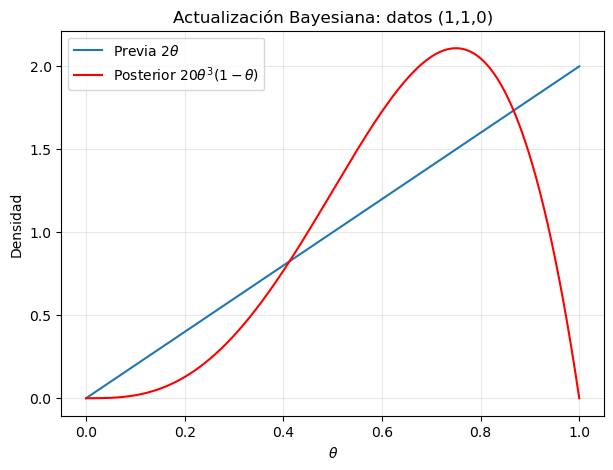

In [10]:
# Graficar previa y posterior
plt.figure(figsize=(7,5))
plt.plot(theta, prior_density, label=r'Previa $2\theta$')
plt.plot(theta, posterior_density, color='red', label=r'Posterior $20\theta^3(1-\theta)$')
plt.xlabel(r'$\theta$'); plt.ylabel('Densidad')
plt.title('Actualización Bayesiana: datos (1,1,0)')
plt.legend(); plt.grid(alpha=0.3)
plt.show()

Ahora que tenemos todos los ingredientes, escribimos nuestra tabla de actualziación Bayesiana, teniendo en mente que:

> No podemos enumerar una fila para cada hipótesis. Solo escribimos una.

| Hipótesis | Rango          | Previa                                     | Verosimilitud              | Numerador de Bayes                                         | Posterior                  |
| --------- | -------------- | ------------------------------------------ | -------------------------- | ---------------------------------------------------------- | -------------------------- |
| $\theta$  | rango $\theta$ | $p(\theta)$                                | $p(x = 1, 1, 0 \| \theta)$ | $p(x = 1, 1, 0 \| \theta)p(\theta)$                        | $p(\theta \| x = 1, 1, 0)$ |
|           |                |                                            |                            |                                                            |                            |
| $\theta$  | [0, 1]         | $2 \theta$                                 | $\theta^2(1-\theta)$       | $2 \theta^3 (1-\theta)$                                    | $20 \theta^3 (1-\theta)$   |
|           |                |                                            |                            |                                                            |                            |
| total     | [0, 1]         | $\int_{0}^{1} 2 \theta \text{d}\theta = 1$ | NO SUMA                    | $\int_{0}^{1} 2 \theta^3 (1-\theta) \text{d}\theta = 1/10$ | $1$                        |

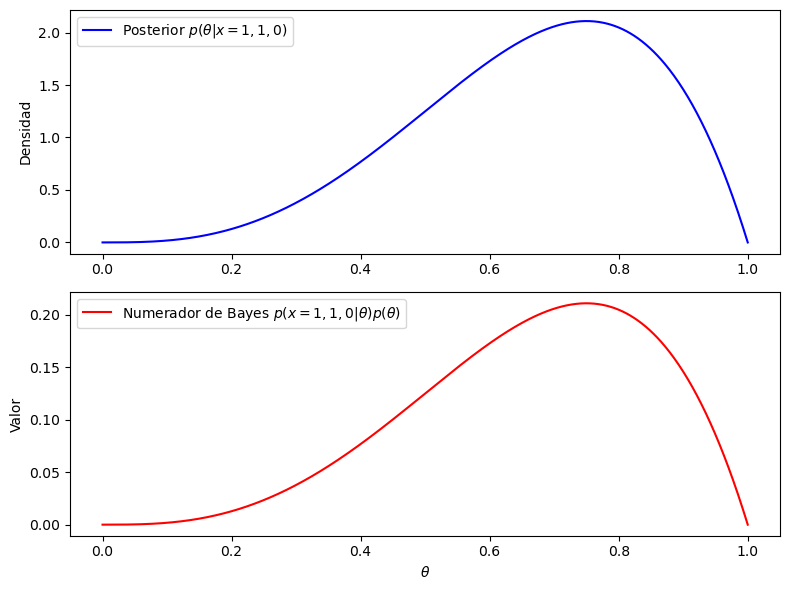

In [11]:
# Graficar numerador y posterior
plt.figure(figsize=(8,6))

plt.subplot(2, 1, 1)
plt.plot(theta, posterior_density, label=r'Posterior $p(\theta|x=1,1,0)$', color='blue')
plt.ylabel("Densidad")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(theta, unnormalized_posterior, label=r'Numerador de Bayes $p(x=1,1,0|\theta)p(\theta)$', color='red')
plt.xlabel(r'$\theta$')
plt.ylabel("Valor")
plt.legend()

plt.tight_layout()
plt.show()

Una vez más, incluso para el caso de previas continuas, tenemos que:

$$
p(\text{hipótesis} | \text{datos}) \propto p(\text{datos} | \text{hipótesis}) p(\text{hpótesis})
$$

o equivalentemente:

$$
\text{posterior} \propto \text{verosimilitud} \cdot \text{previa}.
$$

```{admonition} Sobre la independencia condicional
:class: tip

**Dependencia e independencia en el modelo bayesiano**

- En el modelo bayesiano, los datos son **independientes condicionalmente al parámetro** $\theta$:

$$
p(x_1, x_2 \mid \theta) = p(x_1 \mid \theta)\, p(x_2 \mid \theta)
\quad \Longleftrightarrow \quad 
p(x_2 \mid x_1, \theta) = p(x_2 \mid \theta)
$$

Esto significa que, **si conociéramos el valor de $\theta$**, el resultado del primer tiro no aporta información sobre el segundo.  
La independencia condicional es una **propiedad del modelo**, no de la realidad empírica.

- Cuando **$\theta$ es desconocido**, es decir, cuando debemos integrar sobre su distribución de probabilidad, los tiros son **dependientes marginalmente**:

$$
p(x_1, x_2) = \int p(x_1, x_2 \mid \theta)\, p(\theta)\, d\theta
$$

ya que ambos resultados están correlacionados a través de la incertidumbre compartida en $\theta$.  
Observar el primer tiro modifica la creencia sobre $\theta$ y, por tanto, cambia la probabilidad del segundo.
```

#### Ejemplo 3: (cambio de previa)

En el ejemplo anterior supusimos una distribución previa particular para $\theta$. Esta distribución $p(\theta)=2 \theta$ implica que hay más probabilidad (previa) de que la moneda caiga cara. _¿Qué pasaría si no tuviéramos conocimiento previo alguno de esta probabilidad?_

En este caso, suponemos que la previa es *plana* (uniforme en (0,1)). Similar al ejemplo anterior:

| Hipótesis | Rango          | Previa                              | Verosimilitud              | Numerador de Bayes                                         | Posterior                  |
| --------- | -------------- | ----------------------------------- | -------------------------- | ---------------------------------------------------------- | -------------------------- |
| $\theta$  | [0, 1]         | $1$                                 | $\theta^2(1-\theta)$       | $\theta^2(1-\theta)$                                       | $12 \theta^2 (1-\theta)$   |
|           |                |                                     |                            |                                                            |                            |
| total     | [0, 1]         | $\int_{0}^{1} 1 \text{d}\theta = 1$ | NO SUMA                    | $\int_{0}^{1} \theta^2(1-\theta) \text{d}\theta = 1/12$    | $1$                        |

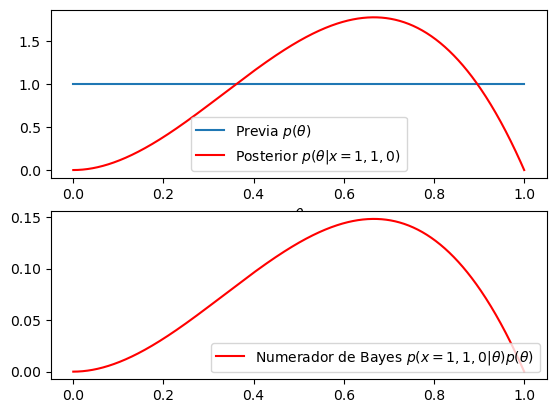

In [12]:
# Graficar previa y posterior

# Theta
theta = np.linspace(0, 1, 1001)
# Previa
prior = np.ones(1001)
# Posterior
posterior = 12 * theta**2 * (1 - theta)
# Graficamos
plt.subplot(2, 1, 1)
plt.plot(theta, prior, label=r'Previa $p(\theta)$')
plt.plot(theta, posterior, color='red', label=r'Posterior $p(\theta|x=1,1,0)$')
plt.legend()
plt.xlabel('$\\theta$')
plt.subplot(2, 1, 2)
num_bayes = theta**2 * (1 - theta)
plt.plot(theta, num_bayes, color='red',label=r'Numerador de Bayes $p(x=1,1,0|\theta)p(\theta)$')
plt.legend()

## Respondiendo preguntas con la distribución posterior

Una vez tenemos la distribución posterior, la podemos utilizar para responder preguntas. Por ejemplo:

1. Primero defines **la posterior** $p(\theta|x)$, es decir, la distribución de probabilidad sobre $\theta$ despúes de ver los datos.

Con una **distribución uniforme** como la anterior, podemos ver que la moneda en principio no está sesgada:

$$
p(\theta > 0.5) = \int_{0.5}^{1} 1 \text{d}\theta = 0.5 = p(\theta < 0.5)
$$


In [13]:
theta = sp.symbols('theta')

integral = sp.integrate(1, (theta, 0.5, 1))

print("p(theta > 0.5) =", integral)

p(theta > 0.5) = 0.500000000000000


Después usas esa _distribución_ para responder preguntas concretas sobre el _parámetro_.

**Ejemplo:** Después de observar la secuencia cara-cara-sello $x = (1, 1, 0)$, pregunta:

_¿qué probabilidad tiene ahora la moneda de estar sesgada a cara ($\theta > 0.5$)?_

```{admoniticion} Otras preguntas
:class: tip

- ¿Cuál es la probabilidad que $\theta > 0.5$?
- ¿cuál es la probabilidad de que $\theta < 0.3$?
- ¿cuál es la probabilidad de que $theta$ esté en el intervalo [0.2, 0.6]?

**Básicamente la distribuión posterior es como una "máquina de responder preguntas" sobre el parámetro $\theta$.**
```

**Definir la posterior**

Sabemos que después de ver $x=(1,1,0)$ la posterior es:

$$
p(\theta | x=1,1,0) = 12 \theta^2 (1-\theta), \quad 0 \leq \theta \leq 1.
$$

In [14]:
theta = sp.symbols('θ')
posterior = 12*theta**2*(1-theta)
posterior

12*θ**2*(1 - θ)

**Probabilidad de que la moneda esté cargada a cara ($\theta > 0.5$)**

$$
p(\theta > 0.5 | x = 1, 1, 0) = \int_{0.5}^{1} 12 \theta^2 (1-\theta) \text{d}\theta = 12 \left(\frac{\theta^3}{3} - \frac{\theta^4}{4}\right)_{0.5}^1 = 1 - \frac{5}{16} =\frac{11}{16} > 0.5$$

In [15]:
prob_theta_gt_05 = sp.integrate(posterior, (theta, 0.5, 1))
prob_theta_gt_05

0.687500000000000

In [16]:
prob_theta_gt_03 = sp.integrate(posterior, (theta, 0, 0.3))
prob_theta_gt_03

0.0837000000000000

In [17]:
prob_theta_btw_02_06 = sp.integrate(posterior, (theta, 0.2, 0.6))
prob_theta_btw_02_06

0.448000000000000

```{figure} ../images/sesion6-densidadquery.png
:alt: representacion
:fig-align: center
:width: 600px
```

**Figura 1.** La distribución posterior $p(\theta | x=1,1,0)$ nos permite responder preguntas sobre el parámetro $\theta$. Por ejemplo, la probabilidad de que la moneda esté cargada a cara ($\theta > 0.5$) es el área bajo la curva desde 0.5 hasta 1 (área sombreada en azul). De la misma forma, podemos calcular la probabilidad de que $\theta$ esté en cualquier otro intervalo.

## Probabilidades predictivas

### Probabilidad predictiva previa

#### Ejemplo 4 (predictiva previa)

Continuando con el ejemplo original, tenemos una moneda con probabilidad desconocida $\theta$ de caer cara y tenemos una pdf previa $p(\theta) = 2 \theta$. 

**Pregunta:** _¿Cuál es la probabilidad de que al lanzar la moneda salga cara?_

**(A) Probabilidad predictiva previa**

Antes de observar ningún dato, la probabilidad de que el primer tiro sea cara es::

$$
p(x_1 = 1) = \int_{0}^{1} p(x_1 = 1 | \theta) p(\theta) \text{d}\theta
$$

sabemos que $p(x_1=1|\theta) =\theta$, por lo que:

$$
p(x_1 = 1) = \int_{0}^{1} \theta \cdot 2 \theta \text{d}\theta = \int_{0}^{1} 2 \theta^2 \text{d}\theta = \frac{2}{3}
$$

#### Cálculo simbólico con `sympy`

In [20]:
theta = sp.symbols('theta')

# Prior
prior = 2*theta

# Verosimilitud de cara
likelihood_cara = theta

# Probabilidad predictiva previa
p_prev = sp.integrate(likelihood_cara * prior, (theta, 0, 1))
p_prev

### Probabilidad predictiva posterior

#### Ejemplo 5 (predictiva posterior)

Continuando con el ejemplo original, tenemos una moneda con probabilidad desconocida $\theta$ de caer cara y tenemos una pdf previa $p(\theta) = 2 \theta$. 

**Pregunta**

Suponga que se hace un tiro y cae cara. Encuentra la probabilidad predictiva posterior de que caiga cara.

**(B) Probabilidad predictiva posterior**

Para la probabilidad predictiva posterior, actualizamos a la posterior:

| Hipótesis | Rango          | Previa                                    | Verosimilitud  | Numerador de Bayes                                | Posterior                  |
| --------- | -------------- | ----------------------------------------- | -------------- | ------------------------------------------------- | -------------------------- |
| $\theta$  | [0, 1]         | $2\theta$                                 | $\theta$       | $2\theta^2$                                       | $3 \theta^2$               |
|           |                |                                           |                |                                                   |                            |
| total     | [0, 1]         | $\int_{0}^{1} 2\theta \text{d}\theta = 1$ | NO SUMA        | $\int_{0}^{1} 2\theta^2 \text{d}\theta = 2/3$     | $1$                        |

In [21]:
# ---- Setup inicial ---- #

sp.init_printing(use_unicode=True)

theta = sp.symbols('theta', real=True)
prior = 2*theta
datos = [1, 1]

In [22]:
# --- Función iterativa ---#

def actualizar_bayes(prior, x):
    """
    Actualiza la distribución previa prior con la observación x (0 o 1)
    usando el teorema de Bayes. Devuelve la posterior normalizada y las
    probabilidades predictivas de cara y sello.
    """

    # verosimilitud
    likelihood = theta if x == 1 else (1 - theta)

    # numerador
    numerador = sp.simplify(prior * likelihood)

    # evidencia (que dijimos que era normalizador) 
    p_evidencia = sp.integrate(numerador, (theta, 0, 1))

    # posterior
    posterior_ = sp.simplify(numerador / p_evidencia)

    # probabilidades predictivas con la posterior
    p_cara  = sp.integrate(theta * posterior_, (theta, 0, 1))
    p_sello = 1 - p_cara

    # tabla
    print("\n-----------------------------------")
    print(f"Observación: x = {x} ({'cara' if x==1 else 'sello'})")
    print("-----------------------------------")
    print(f"{'Columna':15} | {'Expresión'}")
    print("-"*50)
    print(f"{'Previa':15} | {prior}")
    print(f"{'Verosimilitud':15} | {likelihood}")
    print(f"{'Num. Bayes':15} | {numerador}")
    print(f"{'Evidencia':15} | {p_evidencia}")
    print(f"{'Posterior':15} | {posterior_}")
    print("-"*50)
    print(f"Prob. próxima cara  = {sp.nsimplify(p_cara)} ≈ {float(p_cara):.4f}")
    print(f"Prob. próxima sello = {sp.nsimplify(p_sello)} ≈ {float(p_sello):.4f}")

    return posterior_, p_cara, p_sello

In [23]:
# -- Print de tabla y actualización -- #
print("Paso 0 — Prior inicial")
print("p(theta) =", prior)

distribuciones = [(prior, "Paso 0: Prior")]

posterior = prior
for i, x in enumerate(datos, start=1):
    posterior, p_h, p_t = actualizar_bayes(posterior, int(x))
    distribuciones.append((posterior, f"Paso {i}: tras x={x}"))

Paso 0 — Prior inicial
p(theta) = 2*theta

-----------------------------------
Observación: x = 1 (cara)
-----------------------------------
Columna         | Expresión
--------------------------------------------------
Previa          | 2*theta
Verosimilitud   | theta
Num. Bayes      | 2*theta**2
Evidencia       | 2/3
Posterior       | 3*theta**2
--------------------------------------------------
Prob. próxima cara  = 3/4 ≈ 0.7500
Prob. próxima sello = 1/4 ≈ 0.2500

-----------------------------------
Observación: x = 1 (cara)
-----------------------------------
Columna         | Expresión
--------------------------------------------------
Previa          | 3*theta**2
Verosimilitud   | theta
Num. Bayes      | 3*theta**3
Evidencia       | 3/4
Posterior       | 4*theta**3
--------------------------------------------------
Prob. próxima cara  = 4/5 ≈ 0.8000
Prob. próxima sello = 1/5 ≈ 0.2000


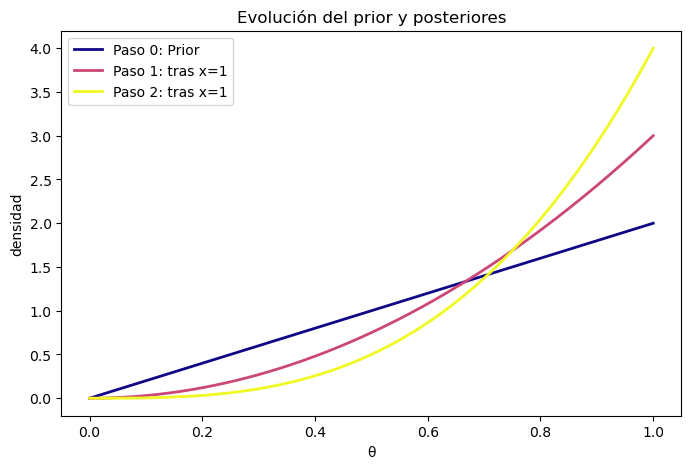

In [24]:
# --- Graficamos ---# 
xs = np.linspace(0, 1, 300)
cmap = plt.cm.plasma 
n = len(distribuciones)

plt.figure(figsize=(8,5))

for i, (pdf, titulo) in enumerate(distribuciones):
    f = sp.lambdify(theta, pdf, "numpy")
    ys = f(xs)
    color = cmap(i / (n-1))
    plt.plot(xs, ys, lw=2, label=titulo, color=color)

plt.xlabel("θ")
plt.ylabel("densidad")
plt.title("Evolución del prior y posteriores")
plt.legend()
plt.show()

### Todo continuo: previas continuas, verosimilitudes continuas

#### Ejemplo 6: (normal-normal)

**Descripción del problema**

* **Nivel 1: Datos**
Supongamos que tenemos un dato $x=5$ que obtuvimos de una distribución normal con media $\theta$ y varianza $1$:

$$ x \sim \mathcal{N}(\theta, 1)$$

* **Nivel 2: Parámetro desconocido**
Supongamo que nuestra _previa_ para el parámetro $\theta$ es también una normal:

$$ \theta \sim \mathcal{N}(2,1)$$

**Pregunta**

> _¿Cuál es la distribución posterior de $\theta$ después de observar $x=5$?_

**Normal en general**

Si una variable aleatoria $Z \sim \mathcal{N}(\mu, \sigma^2)$, su densidad es:

$$
f(z) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\!\left(-\frac{(z-\mu)^2}{2\sigma^2}\right)
$$

**Previa**

En nuestro caso, la previa para $\theta$ es:

- Media: $\mu = 2$  
- Varianza: $1 \implies \sigma = 1$

Por lo tanto:

$$
p(\theta) = \frac{1}{\sqrt{2\pi(1)}} \exp\!\left(-\frac{(\theta - 2)^2}{2(1)}\right)
= \frac{1}{\sqrt{2\pi}} \, e^{-(\theta - 2)^2/2}
$$


**Verosimilitud**

$$
p(x=5 | \theta) = \frac{1}{\sqrt{2 \pi}}e^{-(5 - \theta)^2/2}
$$

**Numerador de Bayes**

$$
\begin{align} \nonumber
p(\theta) \cdot p(x=5 | \theta) 
&= \frac{1}{\sqrt{2 \pi}} 
e^{-\overbrace{(\theta - 2)^2/2}^{\text{prior}}} 
\cdot 
\frac{1}{\sqrt{2 \pi}} 
e^{-\overbrace{(5 - \theta)^2/2}^{\text{verosimilitud}}}
\end{align}
$$


In [25]:
import sympy as sp

theta = sp.symbols('theta')

# expresiones originales
expr1 = -(theta-2)**2/2
expr2 = -(5-theta)**2/2

print("Expresión 1:", sp.latex(expr1))
print("Expresión 2:", sp.latex(expr2))

Expresión 1: - \frac{\left(\theta - 2\right)^{2}}{2}
Expresión 2: - \frac{\left(5 - \theta\right)^{2}}{2}


$$
-\overbrace{\frac{(\theta - 2)^2}{2}}^{\text{prior}}
$$

$$
-\overbrace{\frac{(5 - \theta)^2}{2}}^{\text{verosimilitud}}
$$


$$
-\frac{(\theta - 2)^2}{2}
-\frac{(5 - \theta)^2}{2}
$$

$$
= -\frac{1}{2}\Big[\,(\theta - 2)^2 + (5 - \theta)^2\,\Big]
$$

$$
= -\frac{1}{2}\Big[\,(\theta^2 - 4\theta + 4) + (25 - 10\theta + \theta^2)\,\Big]
$$

$$
= -\frac{1}{2}\Big[\,2\theta^2 - 14\theta + 29\,\Big]
$$

$$
= -\theta^2 + 7\theta - \frac{29}{2}
$$


Lo anterior lo queremos llevar a una forma igual a la forma funcional de una normal:

$$
-(\theta - a)^2 + b
$$

In [ ]:
# completar el cuadrado
expr = -(theta**2 - 7*theta + sp.Rational(29,2))

expr_inside = theta**2 - 7*theta + sp.Rational(29,2)
completed = (theta - sp.Rational(7,2))**2 + sp.Rational(9,4)
final_expr = -(completed)
print(sp.latex(final_expr))

$$
\begin{align*}
-\theta^{2} + 7\theta - \frac{29}{2}
&= -\left(\theta^{2} - 7\theta + \frac{29}{2}\right)
&& \text{(se factoriza el signo negativo)} \\[6pt]
&= -\left[\theta^{2} - 7\theta 
+ \left(\frac{7}{2}\right)^{2} - \left(\frac{7}{2}\right)^{2}
+ \frac{29}{2}\right]
&& \text{(se suma y resta } \left(\frac{7}{2}\right)^{2} \text{ para completar el cuadrado)} \\[6pt]
&= -\left[\left(\theta - \frac{7}{2}\right)^{2} 
- \frac{49}{4} + \frac{29}{2}\right] \\[6pt]
&= -\left(\theta - \frac{7}{2}\right)^{2} 
- \left(-\frac{49}{4} + \frac{29}{2}\right) \\[6pt]
&= -\left(\theta - \frac{7}{2}\right)^{2} 
- \frac{9}{4}
\end{align*}
$$

In [26]:
# sustituir dentro del exponente
mu = sp.Rational(7,2)
const = sp.Rational(9,4)

# expresión actual
expr = -((theta - mu)**2 + const)

# separar los términos
separado = - (theta - mu)**2 - const

# propiedad exponencial
posterior = (1/(2*sp.pi)) * sp.exp(separado)
posterior_fact = sp.exp(-const) * (1/(2*sp.pi)) * sp.exp(- (theta - mu)**2)

print("\nPosterior:", sp.latex(posterior))


Posterior: \frac{e^{- \left(\theta - \frac{7}{2}\right)^{2} - \frac{9}{4}}}{2 \pi}


$$
\begin{align*}
\underbrace{\frac{1}{\sqrt{2\pi}}}_{\text{constante de la previa}} 
e^{-\frac{(\theta - 2)^2}{2}}
\cdot
\underbrace{\frac{1}{\sqrt{2\pi}}}_{\text{constante de la verosimilitud}} 
e^{-\frac{(5 - \theta)^2}{2}}
&= 
\overbrace{\frac{1}{2\pi}}^{\text{producto de constantes (no depende de } \theta\text{)}}
   e^{-\frac{(\theta - 2)^2 + (5 - \theta)^2}{2}} \\[6pt]
&= \frac{1}{2\pi}
   e^{-\theta^{2} + 7\theta - \frac{29}{2}} \\[6pt]
&= \frac{1}{2\pi}
   e^{-\left(\theta - \frac{7}{2}\right)^{2} - \frac{9}{4}} \\[6pt]
&= 
\overbrace{\left(\frac{e^{-9/4}}{2\pi}\right)}^{\text{constante combinada}}
   e^{-(\theta - \frac{7}{2})^{2}} \\[6pt]
&= 
c_1\, e^{-(\theta - \frac{7}{2})^{2}},
\quad \text{donde } 
c_1 = \frac{e^{-9/4}}{2\pi}
\end{align*}
$$


Con lo anterior:


| Hipótesis | Previa        | Verosimilitud   | Numerador de Bayes    | Posterior      |
| --------- | ------------- | --------------- | -------------------- | -------------- |
| $\theta$  | $\frac{1}{\sqrt{2 \pi}}e^{-(\theta - 2)^2/2}$ | $\frac{1}{\sqrt{2 \pi}}e^{-(5 - \theta)^2/2}$ | $c_1 e^{-(\theta - 7/2)^2}$ | $c_2 e^{-(\theta - 7/2)^2}$ |
|           |               |                  |                       |                |
| total     | $1$           | NO SUMA          | $\int_{-\infty}^{\infty} c_1 e^{-(\theta - 7/2)^2} \text{d}\theta = c1/c2$ | $1$   |

A partir de la forma obtenida en la posterior:

$$
e^{-(\theta - \frac{7}{2})^2}
$$

podemos compararla con la forma general de una distribución normal:

$$
e^{-\frac{(\theta - \mu)^2}{2\sigma^2}}
$$

Para que ambas sean equivalentes, el número que acompaña al cuadrado debe coincidir.  
En nuestra expresión es $1$, mientras que en la forma general es $\frac{1}{2\sigma^2}$.
 
Por tanto,

$$
\frac{1}{2\sigma^2} = 1
\quad \Rightarrow \quad
\sigma^2 = \frac{1}{2},
\qquad
\mu = \frac{7}{2}
$$

En consecuencia, la **distribución posterior** sigue una distribución:

$$
\boxed{\text{Normal}\left(\frac{7}{2}, \frac{1}{2}\right)}
$$

```{admonition} Nota
:class: tip

Aunque esta expresión se puede integrar, el proceso se vuelve más complejo y deja de tener una **forma elemental sencilla**.  
Lo importante aquí es notar que esta simplificación proviene de una **prior conjugada**, lo que nos permite mantener la misma familia de distribución (una Normal) y actualizar fácilmente los parámetros sin resolver integrales difíciles.
```

Text(0.5, 0, '$\\theta$')

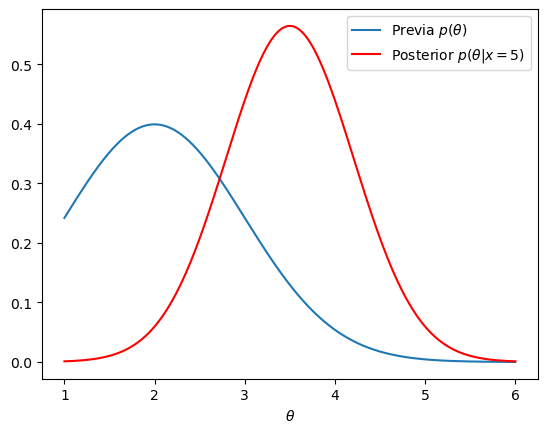

In [27]:
# --- Graficar --- #
from scipy import stats

theta = np.linspace(1, 6, 1001)
# Previa
prior = stats.norm(loc=2, scale=1)
# Posterior
post = stats.norm(loc=7 / 2, scale=np.sqrt(1 / 2))
# Graficamos
plt.plot(theta, prior.pdf(theta), label=r'Previa $p(\theta)$')
plt.plot(theta, post.pdf(theta), color='red', label=r'Posterior $p(\theta|x=5)$')
plt.legend()
plt.xlabel('$\\theta$')

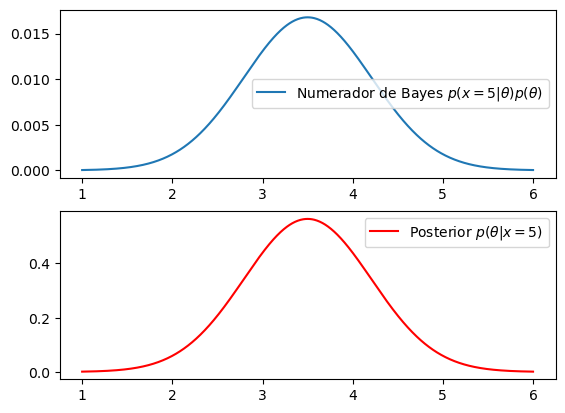

In [28]:
# --- Graficar numerador y posterior --- #
likelihood = stats.norm(
    loc=5, scale=1)

num_bayes = likelihood.pdf(theta) * prior.pdf(theta)

plt.subplot(2, 1, 1)
plt.plot(theta, num_bayes, label=r'Numerador de Bayes $p(x=5|\theta)p(\theta)$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(theta, post.pdf(theta), color='red', label=r'Posterior $p(\theta|x=5)$')
plt.legend()

### Conclusiones

```{admonition} Entonces, ¿qué hicimos en este proceso?
:class: tip

**Resolviste analíticamente la distribución posterior** que surge de una **prior conjugada**.  
Gracias a que la forma funcional se mantiene dentro de la misma familia (en este caso, la Normal),  
no fue necesario realizar integrales complejas: _bastó con manipulación algebraica_.

En este ejemplo particular:

- La **prior** es Normal, centrada en 2.  
- La **verosimilitud** es Normal, centrada en 5.  
- El resultado es otra **Normal**, la **posterior**, centrada en $\tfrac{7}{2}$ con varianza $\tfrac{1}{2}$

Por lo tanto:

$$
p(\theta \mid D) \propto e^{-(\theta - \tfrac{7}{2})^2}
\quad \Longrightarrow \quad
\text{Normal}\!\left(\tfrac{7}{2}, \tfrac{1}{2}\right)
$$  
```